In [20]:
test1<-read.csv('data/testfin.csv', sep=',')

In [21]:
head(test1)

,아파트.계,다세대주택.계,연립주택.계,단독주택.계,X20대1인,X30대1인,X40대1인,X50대1인,X60대1인,생활폐기물재활용률,생활폐기물배출량
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.335,0.117,0.268,0.262,0.2764500,0.1196552,0.1246584,0.10672363,0.08340069,0.5085784,244.8
2,0.618,0.046,0.174,0.141,0.2324919,0.1321764,0.1315190,0.12038741,0.08445087,0.4188401,325.9
3,0.505,0.053,0.243,0.189,0.2165071,0.1472303,0.1155609,0.10053957,0.07540468,0.5452218,234.4
4,0.740,0.022,0.111,0.115,0.2720911,0.1348362,0.1264530,0.10931079,0.07683457,0.5986871,228.5
5,0.358,0.045,0.410,0.171,0.2993371,0.1200302,0.1118281,0.09113818,0.05746296,0.6629073,239.4
6,0.628,0.032,0.159,0.165,0.3353303,0.1037341,0.1076898,0.10732868,0.08347969,0.6457286,318.4


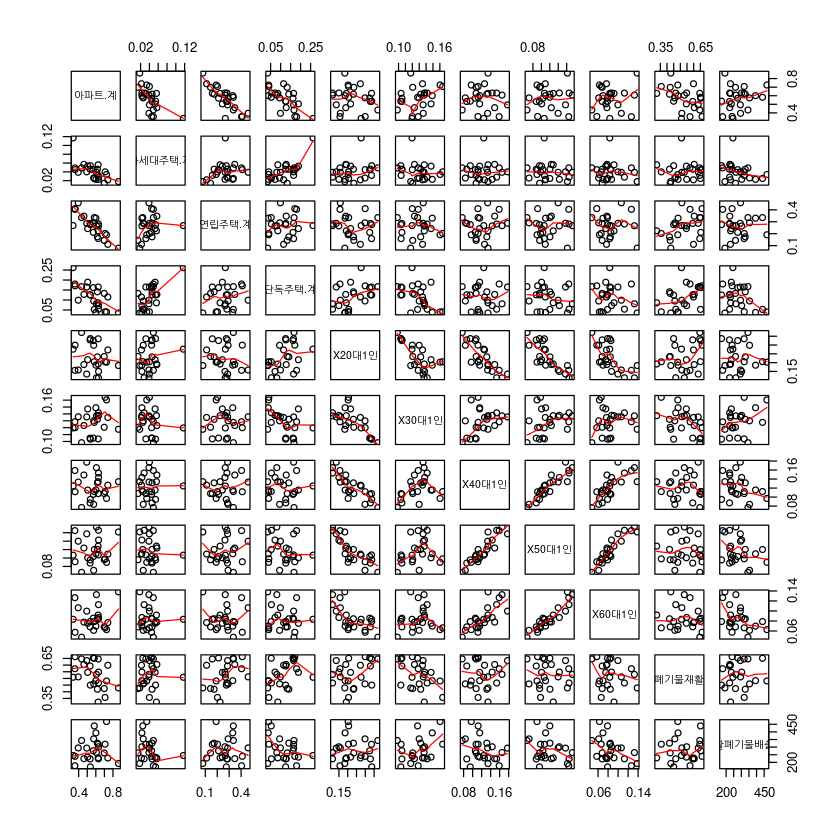

In [22]:
pairs(test1, panel=panel.smooth)

In [4]:
install.packages('corrplot')

Installing package into ‘/home/hadoop/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [5]:
library(corrplot)

corrplot 0.92 loaded



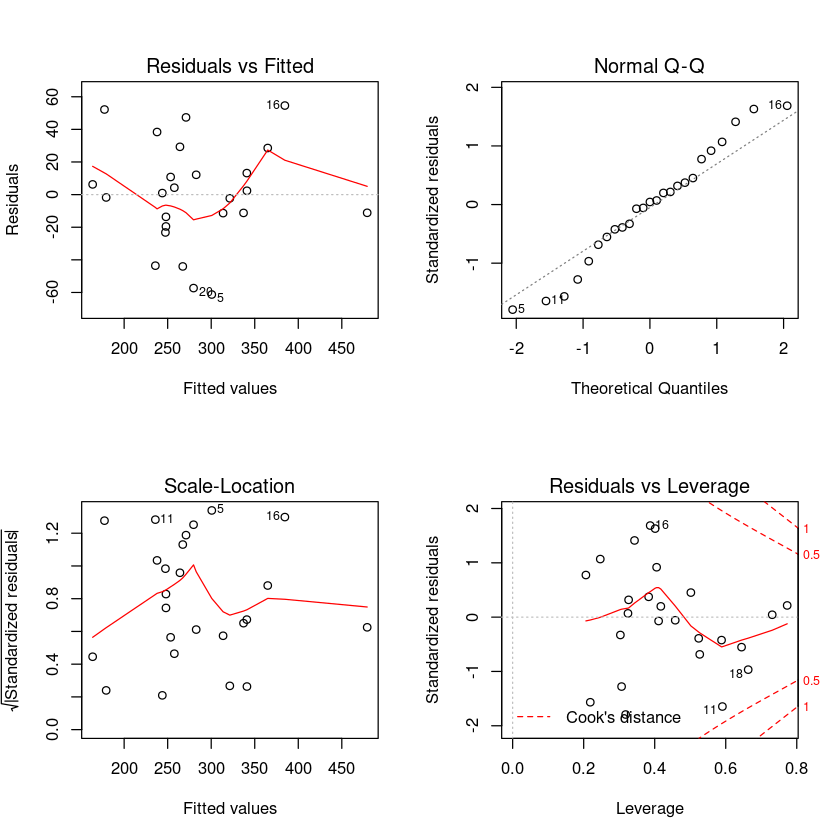

In [23]:
aum <- lm(생활폐기물배출량~., test1)
.opar <- par(no.readonly=T) 
par(mfrow=c(2,2))
plot(aum)

#### 선형성 : 빨간 선은 별로 직선에 가깝지 않아 정규분포도는 그리 높지 않음
#### 정규성 : 가운데는 잔차가 직선에 붙어 있지만 양쪽 끝으로 갈수록 다소 멀어짐
#### 분산성 : 선이 중간에서 굽어 있음. 그나마 분포는 위아래 균등한 편
#### 독립성 : 0.5를 벗어나지는 않지만 이상치들의 영향이 있는 것으로 보임

In [24]:
summary(aum)


Call:
lm(formula = 생활폐기물배출량 ~ ., data = test1)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.256 -13.633   0.941  13.193  54.598 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         18383.9     3946.4   4.658 0.000369 ***
아파트.계          -17247.2     3796.4  -4.543 0.000460 ***
다세대주택.계      -15651.1     3629.3  -4.312 0.000716 ***
연립주택.계        -17414.6     3804.3  -4.578 0.000430 ***
단독주택.계        -18654.0     4062.1  -4.592 0.000419 ***
X20대1인            -1995.3      583.9  -3.417 0.004168 ** 
X30대1인            -1473.0     1329.0  -1.108 0.286400    
X40대1인            -3268.0     1618.7  -2.019 0.063074 .  
X50대1인            -1809.7     2615.6  -0.692 0.500326    
X60대1인              560.5     1759.6   0.319 0.754790    
생활폐기물재활용률    599.9      143.2   4.190 0.000908 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.37 on 14 degrees of freedom
Multiple R-squared:  0.8284,	Adjusted 

#### 의미있는 변수 : 아파트/계, 다세대주택/계, 연립주택/계, 단독주택/계, 20대1인가구/전체1인가구, 40대1인가구/전체1인가구, 생활폐기물재활용률

#### 모델의 결정력 - 조정된 R계수: 0.7059. 이 변수 모델은 0.75에는 미치지 못하지만 대략 전체의 70%정도는 설명할 수 있음
#### P 밸류 - 0.0007552 < 0.05로 귀무가설 기각

In [8]:
step(lm(생활폐기물배출량~., data=test1), direction='backward')

Start:  AIC=193.63
생활폐기물배출량 ~ 아파트.계 + 다세대주택.계 + 
    연립주택.계 + 단독주택.계 + X20대1인 + X30대1인 + 
    X40대1인 + X50대1인 + X60대1인 + 생활폐기물재활용률

                     Df Sum of Sq   RSS    AIC
- X60대1인            1       174 24135 191.81
- X50대1인            1       819 24781 192.47
<none>                            23962 193.63
- X30대1인            1      2102 26064 193.74
- X40대1인            1      6976 30938 198.02
- X20대1인            1     19986 43948 206.80
- 생활폐기물재활용률  1     30051 54013 211.95
- 다세대주택.계       1     31831 55792 212.76
- 아파트.계           1     35325 59287 214.28
- 연립주택.계         1     35865 59827 214.51
- 단독주택.계         1     36093 60055 214.60

Step:  AIC=191.81
생활폐기물배출량 ~ 아파트.계 + 다세대주택.계 + 
    연립주택.계 + 단독주택.계 + X20대1인 + X30대1인 + 
    X40대1인 + X50대1인 + 생활폐기물재활용률

                     Df Sum of Sq   RSS    AIC
- X50대1인            1      1563 25698 191.38
- X30대1인            1      1930 26065 191.74
<none>                            24135 191.81
- X40대1인            1     13096 3723


Call:
lm(formula = 생활폐기물배출량 ~ 아파트.계 + 다세대주택.계 + 
    연립주택.계 + 단독주택.계 + X20대1인 + X40대1인 + 
    생활폐기물재활용률, data = test1)

Coefficients:
       (Intercept)           아파트.계       다세대주택.계         연립주택.계  
           16666.0            -15906.7            -14522.4            -16038.4  
       단독주택.계            X20대1인            X40대1인  생활폐기물재활용률  
          -17094.0             -1493.4             -3997.5               572.6  


#### 후진제거법 적용 결과 - Summary 기술통계함수로 나온 변수와 일치

In [10]:
apt <- test1$아파트.계
multi <- test1$다세대주택.계
row <- test1$연립주택.계
house <- test1$단독주택.계
twenty <- test1$X20대1인
forty <- test1$X40대1인
repercent <- test1$생활폐기물재활용률
trash <- test1$생활폐기물배출량
test2 <- data.frame(apt, multi, row, house, twenty, forty, repercent, trash)

In [11]:
test2

apt,multi,row,house,twenty,forty,repercent,trash
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.335,0.117,0.268,0.262,0.2764500,0.12465843,0.5085784,244.8
0.618,0.046,0.174,0.141,0.2324919,0.13151898,0.4188401,325.9
0.505,0.053,0.243,0.189,0.2165071,0.11556086,0.5452218,234.4
0.740,0.022,0.111,0.115,0.2720911,0.12645298,0.5986871,228.5
0.358,0.045,0.410,0.171,0.2993371,0.11182806,0.6629073,239.4
0.628,0.032,0.159,0.165,0.3353303,0.10768978,0.6457286,318.4
0.494,0.040,0.287,0.165,0.1351117,0.17745782,0.6339468,293.4
0.571,0.045,0.211,0.162,0.3251341,0.10603154,0.6535119,276.2
0.356,0.049,0.404,0.180,0.1562220,0.15889242,0.5726351,177.6


In [15]:
library(car)

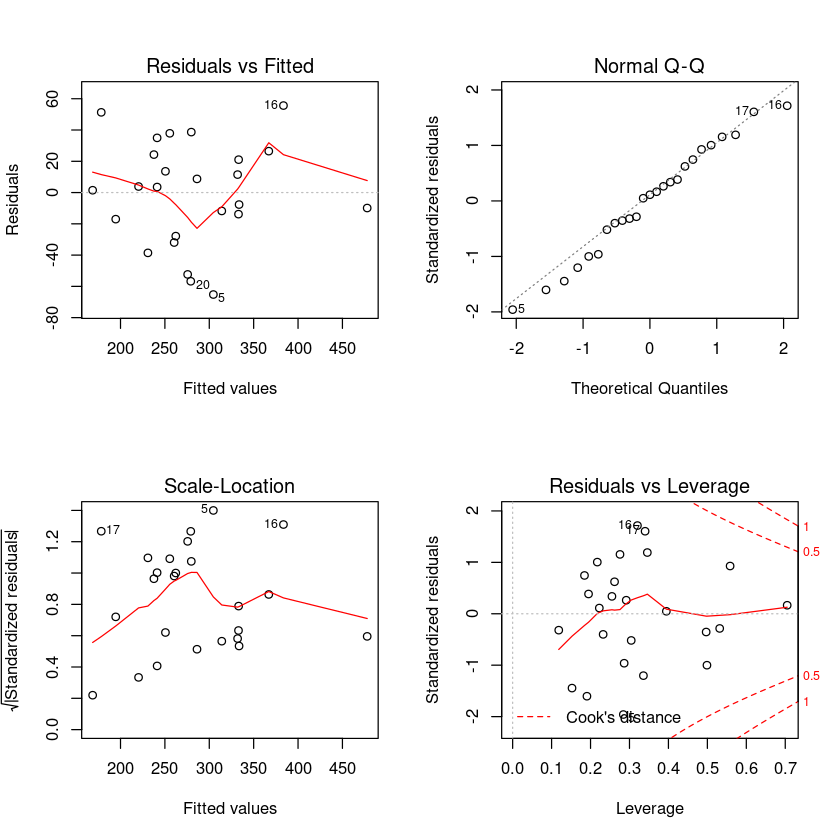

In [28]:
aum2 <- lm(trash~., test2)
.opar <- par(no.readonly=T) 
par(mfrow=c(2,2))
plot(aum2)

In [29]:
round(vif(aum2),2)

apt     multi       row     house    twenty     forty repercent 
  2268.83     51.92   1138.94    502.99      9.21      6.63      2.23

#### 다중공선성의 경우 주택형태들이 너무 높은 상관성을 보이는 반면 그 외 변수는 상대적으로 덜함

In [30]:
cor(test2)

,apt,multi,row,house,twenty,forty,repercent,trash
apt,1.00000000,-0.64534464,-0.82088605,-0.69183777,-0.161195334,-0.05840589,-0.44879842,0.182693706
multi,-0.64534464,1.00000000,0.24749726,0.68324193,0.223961528,0.02391369,0.03019716,-0.281496608
row,-0.82088605,0.24749726,1.00000000,0.17016853,-0.123215938,0.10385830,0.34788570,0.029792154
house,-0.69183777,0.68324193,0.17016853,1.00000000,0.445992589,-0.02744226,0.43068073,-0.368646841
twenty,-0.16119533,0.22396153,-0.12321594,0.44599259,1.000000000,-0.82032373,0.29301418,-0.004387196
forty,-0.05840589,0.02391369,0.10385830,-0.02744226,-0.820323726,1.00000000,-0.01867946,-0.326452744
repercent,-0.44879842,0.03019716,0.34788570,0.43068073,0.293014178,-0.01867946,1.00000000,0.073944204
trash,0.18269371,-0.28149661,0.02979215,-0.36864684,-0.004387196,-0.32645274,0.07394420,1.000000000
